In [1]:
# Importing packages
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

% matplotlib inline

In [2]:
# The URL to extract our data from. 
left_half = 'https://api.data.gov/ed/collegescorecard/v1/schools?school.degrees_awarded.predominant=3&fields=school.name,school.city,school.state,id,2013.admissions.admission_rate.overall,2013.admissions.admission_rate.by_ope_id,2013.admissions.sat_scores.25th_percentile.critical_reading,2013.admissions.sat_scores.75th_percentile.critical_reading,2013.admissions.sat_scores.25th_percentile.math,2013.admissions.sat_scores.75th_percentile.math,2013.admissions.sat_scores.25th_percentile.writing,2013.admissions.sat_scores.75th_percentile.writing,2013.admissions.sat_scores.midpoint.critical_reading,2013.admissions.sat_scores.midpoint.math,2013.admissions.sat_scores.midpoint.writing,2013.admissions.act_scores.25th_percentile.cumulative,2013.admissions.act_scores.75th_percentile.cumulative,2013.admissions.act_scores.25th_percentile.english,2013.admissions.act_scores.75th_percentile.english,2013.admissions.act_scores.25th_percentile.math,2013.admissions.act_scores.75th_percentile.math,2013.admissions.act_scores.25th_percentile.writing,2013.admissions.act_scores.75th_percentile.writing,2013.admissions.act_scores.midpoint.cumulative,2013.admissions.act_scores.midpoint.english,2013.admissions.act_scores.midpoint.math,2013.admissions.act_scores.midpoint.writing,2013.admissions.sat_scores.average.overall,2013.admissions.sat_scores.average.by_ope_id,2013.academics.program_percentage.agriculture,2013.academics.program_percentage.architecture,2013.academics.program_percentage.computer,2013.academics.program_percentage.communications_technology,2013.academics.program_percentage.computer,2013.academics.program_percentage.engineering,2013.academics.program_percentage.engineering_technology,2013.academics.program_percentage.biological,2013.academics.program_percentage.mathematics,2013.academics.program_percentage.physical_science,2013.academics.program_percentage.science_technology&page='
right_half = '&per_page=100&api_key=0KEgRdQsOFkuPWWy2zvtxKbok6q2UTe20ODoc8ij'

In [3]:
# Function that extract the url's of the collegescorecard.com and iterates theough each url to extract the data.
dict1 = {}
df2 = pd.DataFrame(dict1)
list1 = []

for i in range(1, 20):
    list1.append(left_half + str(i) + right_half)
    #print(list1.append(i))
    for url in list1:
        api = requests.get(url)
        api_dict=json.loads(api.content)
        #print(i, url, api.content)
        df = pd.DataFrame(api_dict['results']) # Turn data extracted from each page into a dataframe.
        df2 = pd.concat([df2, df], axis=0) # Concat the dataframe of each page together.

In [4]:
df2.notnull().sum() # Checking the data set for values that are not null values.

2013.academics.program_percentage.agriculture                  18642
2013.academics.program_percentage.architecture                 18642
2013.academics.program_percentage.biological                   18642
2013.academics.program_percentage.communications_technology    18642
2013.academics.program_percentage.computer                     18642
2013.academics.program_percentage.engineering                  18642
2013.academics.program_percentage.engineering_technology       18642
2013.academics.program_percentage.mathematics                  18642
2013.academics.program_percentage.physical_science             18642
2013.academics.program_percentage.science_technology           18642
2013.admissions.act_scores.25th_percentile.cumulative          11393
2013.admissions.act_scores.25th_percentile.english              9876
2013.admissions.act_scores.25th_percentile.math                 9890
2013.admissions.act_scores.25th_percentile.writing              2737
2013.admissions.act_scores.75th_pe

In [5]:
df2.isnull().sum() #Checking for all null values. 

2013.academics.program_percentage.agriculture                    358
2013.academics.program_percentage.architecture                   358
2013.academics.program_percentage.biological                     358
2013.academics.program_percentage.communications_technology      358
2013.academics.program_percentage.computer                       358
2013.academics.program_percentage.engineering                    358
2013.academics.program_percentage.engineering_technology         358
2013.academics.program_percentage.mathematics                    358
2013.academics.program_percentage.physical_science               358
2013.academics.program_percentage.science_technology             358
2013.admissions.act_scores.25th_percentile.cumulative           7607
2013.admissions.act_scores.25th_percentile.english              9124
2013.admissions.act_scores.25th_percentile.math                 9110
2013.admissions.act_scores.25th_percentile.writing             16263
2013.admissions.act_scores.75th_pe

In [6]:
df2.info() # descriptive summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19000 entries, 0 to 99
Data columns (total 39 columns):
2013.academics.program_percentage.agriculture                  18642 non-null float64
2013.academics.program_percentage.architecture                 18642 non-null float64
2013.academics.program_percentage.biological                   18642 non-null float64
2013.academics.program_percentage.communications_technology    18642 non-null float64
2013.academics.program_percentage.computer                     18642 non-null float64
2013.academics.program_percentage.engineering                  18642 non-null float64
2013.academics.program_percentage.engineering_technology       18642 non-null float64
2013.academics.program_percentage.mathematics                  18642 non-null float64
2013.academics.program_percentage.physical_science             18642 non-null float64
2013.academics.program_percentage.science_technology           18642 non-null float64
2013.admissions.act_scores.25th_pe

In [7]:
new_df = df2.reset_index(drop='index') # resetting the index

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 39 columns):
2013.academics.program_percentage.agriculture                  18642 non-null float64
2013.academics.program_percentage.architecture                 18642 non-null float64
2013.academics.program_percentage.biological                   18642 non-null float64
2013.academics.program_percentage.communications_technology    18642 non-null float64
2013.academics.program_percentage.computer                     18642 non-null float64
2013.academics.program_percentage.engineering                  18642 non-null float64
2013.academics.program_percentage.engineering_technology       18642 non-null float64
2013.academics.program_percentage.mathematics                  18642 non-null float64
2013.academics.program_percentage.physical_science             18642 non-null float64
2013.academics.program_percentage.science_technology           18642 non-null float64
2013.admissions.act_scores.25th

In [9]:
new_df.shape # Dataframe dimension

(19000, 39)

In [10]:
new_df.iloc[18950:18999, :] # A look into the last set of observations in the dataset.

2013.academics.program_percentage.agriculture  \
18950                                         0.0000   
18951                                         0.0000   
18952                                         0.0000   
18953                                         0.0000   
18954                                         0.0693   
18955                                         0.0000   
18956                                         0.0000   
18957                                         0.0000   
18958                                         0.0000   
18959                                         0.0000   
18960                                         0.0000   
18961                                         0.0000   
18962                                         0.0000   
18963                                         0.0000   
18964                                         0.0000   
18965                                         0.0000   
18966                                         0.0000   
18967                                         0.0000   
18968                                         0.0000   
18969                                         0.0000   
18970                                         0.0000   
18971                                         0.0000   
18972                                         0.0325   
18973                                         0.0497   
18974                                         0.0000   
18975                                         0.0324   
18976                                         0.0215   
18977                                         0.0000   
18978                                         0.0000   
18979                                         0.0000   
18980                                         0.0000   
18981                                         0.0000   
18982                                         0.0000   
18983                                         0.0833   
18984                                         0.0000   
18985                                         0.0000   
18986                                         0.0000   
18987                                         0.0531   
18988                                         0.0000   
18989                                         0.0385   
18990                                         0.0000   
18991                                         0.0000   
18992                                         0.0385   
18993                                         0.0000   
18994                                         0.0000   
18995                                         0.0000   
18996                                         0.0000   
18997                                         0.0000   
18998                                         0.0000   

       2013.academics.program_percentage.architecture  \
18950                                          0.0000   
18951                                          0.0000   
18952                                          0.0000   
18953                                          0.0000   
18954                                          0.0000   
18955                                          0.0000   
18956                                          0.0000   
18957                                          0.0000   
18958                                          0.0000   
18959                                          0.0000   
18960                                          0.0000   
18961                                          0.0000   
18962                                          0.0000   
18963                                          0.0000   
18964                                          0.0000   
18965                                          0.0000   
18966                                          0.0000   
18967                                          0.0000   
18968                                          0.0000   
18969                                          0.0000   
18970    

In [11]:
new_df.to_csv('admissions.csv',index=False) # Saving our dataset in csv file on my local machine so I can load locally.

In [12]:
sat_admit = pd.read_csv('admissions.csv') #Loading my admissions data locally

In [13]:
sat_admit.columns # Previewing the column headers for our data set.

Index(['2013.academics.program_percentage.agriculture',
       '2013.academics.program_percentage.architecture',
       '2013.academics.program_percentage.biological',
       '2013.academics.program_percentage.communications_technology',
       '2013.academics.program_percentage.computer',
       '2013.academics.program_percentage.engineering',
       '2013.academics.program_percentage.engineering_technology',
       '2013.academics.program_percentage.mathematics',
       '2013.academics.program_percentage.physical_science',
       '2013.academics.program_percentage.science_technology',
       '2013.admissions.act_scores.25th_percentile.cumulative',
       '2013.admissions.act_scores.25th_percentile.english',
       '2013.admissions.act_scores.25th_percentile.math',
       '2013.admissions.act_scores.25th_percentile.writing',
       '2013.admissions.act_scores.75th_percentile.cumulative',
       '2013.admissions.act_scores.75th_percentile.english',
       '2013.admissions.act_scores.75

In [14]:
# Replacing the column names to a more readeable names.
sat_admit.columns = [['P_AGRIC', 'P_ARCH', 'P_BIOL', 'P_COMM_TECH', 'P_COMP', 'P_ENGR', 'P_ENGR_TECH', 'P_MATHS', 
                    'P_PHY_SCI', 'P_SCI_TECH', 'ACTCM25', 'ACTEN25', 'ACTMT25', 'ACTWR25', 'ACTCM75', 'ACTEN75', 
                    'ACTMT75', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'ADM_RATE_ALL', 'ADM_RATE',
                    'SATVR25', 'SATMT25', 'SATWR25', 'SATVR75', 'SATMT75', 'SATWR75', 'SAT_AVG_ALL', 'SAT_AVG', 
                    'SATVRMID', 'SATMTMID', 'SATWRMID', 'id', 'city', 'Name', 'State']]

In [15]:
# Printing out the new column header
sat_admit.columns

Index(['P_AGRIC', 'P_ARCH', 'P_BIOL', 'P_COMM_TECH', 'P_COMP', 'P_ENGR',
       'P_ENGR_TECH', 'P_MATHS', 'P_PHY_SCI', 'P_SCI_TECH', 'ACTCM25',
       'ACTEN25', 'ACTMT25', 'ACTWR25', 'ACTCM75', 'ACTEN75', 'ACTMT75',
       'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID',
       'ADM_RATE_ALL', 'ADM_RATE', 'SATVR25', 'SATMT25', 'SATWR25', 'SATVR75',
       'SATMT75', 'SATWR75', 'SAT_AVG_ALL', 'SAT_AVG', 'SATVRMID', 'SATMTMID',
       'SATWRMID', 'id', 'city', 'Name', 'State'],
      dtype='object')

In [16]:
sat_admit_null = sat_admit.isnull().sum() # The null values of features in the dataset.

In [17]:
sat_admit_null = sat_admit_null[sat_admit_null != 0] # Extracting the null values that are not equals to zero.

In [18]:
sat_admit_null[sat_admit_null != 0]/sat_admit.shape[0] # Checking the percentage of null values in the dataset.
                                                       # This helps with Feature selection. Since most of the important
                                                       # Features have null values that are more than 20%, the only 
                                                       # logical thing to do is to drop the observations with null
                                                       # values. Dropping of features will not help inform us about
                                                       # the data.

P_AGRIC         0.018842
P_ARCH          0.018842
P_BIOL          0.018842
P_COMM_TECH     0.018842
P_COMP          0.018842
P_ENGR          0.018842
P_ENGR_TECH     0.018842
P_MATHS         0.018842
P_PHY_SCI       0.018842
P_SCI_TECH      0.018842
ACTCM25         0.400368
ACTEN25         0.480211
ACTMT25         0.479474
ACTWR25         0.855947
ACTCM75         0.400368
ACTEN75         0.480211
ACTMT75         0.479474
ACTWR75         0.855947
ACTCMMID        0.400368
ACTENMID        0.480211
ACTMTMID        0.479474
ACTWRMID        0.855947
ADM_RATE_ALL    0.202684
ADM_RATE        0.224947
SATVR25         0.408421
SATMT25         0.403474
SATWR25         0.639368
SATVR75         0.408421
SATMT75         0.403474
SATWR75         0.639368
SAT_AVG_ALL     0.352053
SAT_AVG         0.365158
SATVRMID        0.408421
SATMTMID        0.403474
SATWRMID        0.639368
dtype: float64

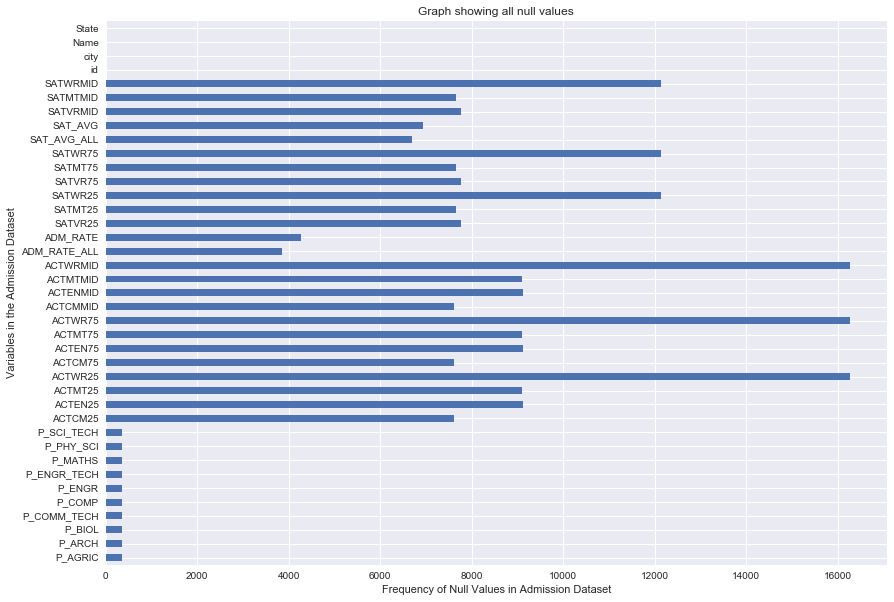

In [19]:
# Plotting the total number of Null Values in this Dataset.
fig, ax = plt.subplots(figsize=(14,10))
sat_admit.isnull().sum().plot(kind='barh', ax=ax,  title = 'Graph showing all null values')
ax.set_xlabel('Frequency of Null Values in Admission Dataset')
ax.set_ylabel('Variables in the Admission Dataset')


In [20]:
# Checking for each unique state with an ACT and SAT scores.
sat_admit.State.unique()

array(['NV', 'MO', 'NH', 'NE', 'MS', 'MN', 'KS', 'NY', 'NC', 'ND', 'OH',
       'OK', 'LA', 'KY', 'IA', 'MD', 'MA', 'ME', 'IN', 'OR', 'TN', 'SD',
       'RI', 'SC', 'PA', 'TX', 'UT', 'MI', 'CO', 'WA', 'VA', 'CA', 'FL',
       'GU', 'AL', 'GA', 'DE', 'NJ', 'AZ', 'WV', 'CT', 'DC', 'AR', 'HI',
       'ID', 'IL', 'WI', 'NM', 'PR', 'VT', 'AK', 'VI', 'MT', 'WY'], dtype=object)

In [21]:
sat_admit.describe() # Summary statistics of the features.

P_AGRIC        P_ARCH        P_BIOL   P_COMM_TECH        P_COMP  \
count  18642.000000  18642.000000  18642.000000  18642.000000  18642.000000   
mean       0.003966      0.003551      0.044223      0.003925      0.028986   
std        0.021936      0.033535      0.062319      0.029247      0.075886   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.030500      0.000000      0.010100   
75%        0.000000      0.000000      0.065600      0.000000      0.025900   
max        0.389600      1.000000      1.000000      0.714300      1.000000   

             P_ENGR   P_ENGR_TECH       P_MATHS     P_PHY_SCI    P_SCI_TECH  \
count  18642.000000  18642.000000  18642.000000  18642.000000  18642.000000   
mean       0.021418      0.006239      0.008842      0.011546      0.000273   
std        0.076981      0.023015      0.012876      0.019742      0.004411   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.004500      0.003200      0.000000   
75%        0.000000      0.000000      0.012900      0.016500      0.000000   
max        1.000000      0.290400      0.125000      0.199400      0.142300   

           ...            SATWR25       SATVR75       SATMT75      SATWR75  \
count      ...        6852.000000  11240.000000  11334.000000  6852.000000   
mean       ...         468.768827    576.479804    585.789571   575.208844   
std        ...          78.484907     68.898239     71.203388    77.935326   
min        ...         310.000000    360.000000    400.000000   360.000000   
25%        ...         420.000000    530.000000    540.000000   520.000000   
50%        ...         450.000000    570.000000    580.000000   560.000000   
75%        ...         500.000000    620.000000    622.000000   610.000000   
max        ...         720.000000    800.000000    800.000000   800.000000   

        SAT_AVG_ALL       SAT_AVG      SATVRMID      SATMTMID     SATWRMID  \
count  12311.000000  12062.000000  11240.000000  11334.000000  6852.000000   
mean    1061.858663   1058.724258    522.218683    531.389007   522.020432   
std      130.580173    130.865785     66.926292     70.550336    76.982458   
min      666.000000    666.000000    335.000000    365.000000   350.000000   
25%      979.000000    975.000000    475.000000    485.000000   470.000000   
50%     1047.000000   1039.000000    514.000000    520.000000   509.000000   
75%     1122.000000   1117.000000    555.000000    565.000000   560.000000   
max     1534.000000   1534.000000    760.000000    785.000000   755.000000   

                  id  
count   19000.000000  
mean   228002.335105  
std    108175.142098  
min    100654.000000  
25%    154712.000000  
50%    199698.000000  
75%    231712.000000  
max    487010.000000  

[8 rows x 36 columns]

In [22]:
sat_admin_new = sat_admit.dropna() #dropping rows with null values.

In [23]:
sat_admin_new.describe() # description of the new dataframe after calling dropna().

P_AGRIC       P_ARCH       P_BIOL  P_COMM_TECH       P_COMP  \
count  2649.000000  2649.000000  2649.000000  2649.000000  2649.000000   
mean      0.007358     0.007869     0.058004     0.001949     0.023006   
std       0.035569     0.067548     0.046447     0.012059     0.030506   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.028400     0.000000     0.005000   
50%       0.000000     0.000000     0.049700     0.000000     0.015800   
75%       0.000000     0.000000     0.082400     0.000000     0.028000   
max       0.389600     1.000000     0.302300     0.139400     0.224500   

            P_ENGR  P_ENGR_TECH      P_MATHS    P_PHY_SCI   P_SCI_TECH  \
count  2649.000000  2649.000000  2649.000000  2649.000000  2649.000000   
mean      0.038376     0.008322     0.013100     0.017473     0.000056   
std       0.080086     0.028642     0.016448     0.022051     0.001113   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.003400     0.000000     0.000000   
50%       0.000000     0.000000     0.008800     0.012800     0.000000   
75%       0.045500     0.000000     0.017900     0.022100     0.000000   
max       0.583900     0.240900     0.125000     0.175800     0.028300   

           ...            SATWR25      SATVR75      SATMT75      SATWR75  \
count      ...        2649.000000  2649.000000  2649.000000  2649.000000   
mean       ...         478.404681   596.695734   606.240846   584.130993   
std        ...          83.452336    75.505619    79.370589    80.789798   
min        ...         320.000000   440.000000   440.000000   430.000000   
25%        ...         420.000000   540.000000   550.000000   520.000000   
50%        ...         460.000000   590.000000   600.000000   570.000000   
75%        ...         520.000000   650.000000   650.000000   630.000000   
max        ...         720.000000   800.000000   800.000000   800.000000   

       SAT_AVG_ALL      SAT_AVG     SATVRMID     SATMTMID     SATWRMID  \
count  2649.000000  2649.000000  2649.000000  2649.000000  2649.000000   
mean   1109.735749  1099.265761   541.839185   552.030578   531.288411   
std     147.780407   151.727521    75.776672    80.522624    80.995141   
min     775.000000   775.000000   400.000000   390.000000   395.000000   
25%     995.000000   984.000000   480.000000   495.000000   470.000000   
50%    1087.000000  1075.000000   530.000000   535.000000   515.000000   
75%    1199.000000  1197.000000   590.000000   600.000000   575.000000   
max    1534.000000  1534.000000   760.000000   785.000000   755.000000   

                  id  
count    2649.000000  
mean   194797.194413  
std     60265.147849  
min    100751.000000  
25%    151379.000000  
50%    198969.000000  
75%    217420.000000  
max    479956.000000  

[8 rows x 36 columns]

In [24]:
sat_admin_new = sat_admin_new.reset_index() # resetting the index of the dataframe after dropping all null values.

In [25]:
sat_admin_new.head()

index  P_AGRIC  P_ARCH  P_BIOL  P_COMM_TECH  P_COMP  P_ENGR  P_ENGR_TECH  \
0      1      0.0  0.0255  0.1022          0.0  0.0324  0.1551       0.0000   
1     10      0.0  0.0000  0.0907          0.0  0.0343  0.0000       0.0000   
2     19      0.0  0.0000  0.0386          0.0  0.0094  0.0105       0.0000   
3     34      0.0  0.0000  0.0546          0.0  0.0047  0.0000       0.0000   
4     40      0.0  0.0018  0.0438          0.0  0.0097  0.0000       0.0165   

   P_MATHS  P_PHY_SCI  ...    SATWR75  SAT_AVG_ALL  SAT_AVG  SATVRMID  \
0   0.0212     0.0349  ...      770.0       1474.0   1474.0     730.0   
1   0.0221     0.0539  ...      575.0       1155.0   1155.0     543.0   
2   0.0082     0.0176  ...      600.0       1129.0   1129.0     560.0   
3   0.0265     0.0094  ...      610.0       1098.0   1098.0     550.0   
4   0.0032     0.0167  ...      590.0       1156.0   1156.0     570.0   

   SATMTMID  SATWRMID      id          city  \
0     755.0     735.0  179867   Saint Louis   
1     553.0     518.0  174792  Collegeville   
2     565.0     555.0  196176     New Paltz   
3     570.0     560.0  188429   Garden City   
4     580.0     545.0  197869         Boone   

                                        Name  State  
0          Washington University in St Louis     MO  
1                     Saint Johns University     MN  
2  State University of New York at New Paltz     NY  
3                         Adelphi University     NY  
4               Appalachian State University     NC  

[5 rows x 40 columns]

In [26]:
sat_admin_new.iloc[0:10, 15:35]

ACTCM75  ACTEN75  ACTMT75  ACTWR75  ACTCMMID  ACTENMID  ACTMTMID  ACTWRMID  \
0     34.0     35.0     35.0     10.0      33.0      34.0      33.0       9.0   
1     28.0     27.0     28.0      8.0      26.0      24.0      26.0       7.0   
2     27.0     28.0     26.0      9.0      25.0      25.0      25.0       9.0   
3     24.0     26.0     27.0      8.0      22.0      23.0      25.0       8.0   
4     28.0     28.0     27.0      8.0      26.0      26.0      25.0       8.0   
5     19.0     18.0     19.0      7.0      18.0      17.0      18.0       7.0   
6     25.0     27.0     25.0      8.0      22.0      23.0      22.0       7.0   
7     21.0     21.0     23.0      8.0      18.0      18.0      20.0       7.0   
8     28.0     28.0     28.0      9.0      26.0      25.0      26.0       9.0   
9     26.0     25.0     25.0      8.0      24.0      23.0      22.0       7.0   

   ADM_RATE_ALL  ADM_RATE  SATVR25  SATMT25  SATWR25  SATVR75  SATMT75  \
0        0.1555    0.1555    700.0    720.0    700.0    760.0    790.0   
1        0.7516    0.7516    475.0    480.0    460.0    610.0    625.0   
2        0.4359    0.4359    510.0    520.0    510.0    610.0    610.0   
3        0.6814    0.6814    500.0    520.0    510.0    600.0    620.0   
4        0.6323    0.6323    520.0    540.0    500.0    620.0    620.0   
5        0.5496    0.5496    380.0    400.0    360.0    450.0    470.0   
6        0.4817    0.4817    440.0    460.0    430.0    550.0    570.0   
7        0.7831    0.7831    390.0    400.0    380.0    500.0    520.0   
8        0.4949    0.4949    500.0    540.0    520.0    620.0    650.0   
9        0.5967    0.5967    480.0    470.0    460.0    600.0    590.0   

   SATWR75  SAT_AVG_ALL  SAT_AVG  SATVRMID  SATMTMID  
0    770.0       1474.0   1474.0     730.0     755.0  
1    575.0       1155.0   1155.0     543.0     553.0  
2    600.0       1129.0   1129.0     560.0     565.0  
3    610.0       1098.0   1098.0     550.0     570.0  
4    590.0       1156.0   1156.0     570.0     580.0  
5    430.0        851.0    851.0     415.0     435.0  
6    550.0       1018.0   1018.0     495.0     515.0  
7    480.0        891.0    891.0     445.0     460.0  
8    630.0       1158.0   1158.0     560.0     595.0  
9    560.0       1075.0   1075.0     540.0     530.0

In [27]:
sat_admin_new.groupby('Name')['SAT_AVG'].unique().sort_values(ascending=False) # Shows the schools in our dataset 
                                                                               # with sorted SAT Average.

Name
California Institute of Technology                               [1534.0]
University of Chicago                                            [1504.0]
Massachusetts Institute of Technology                            [1503.0]
Harvard University                                               [1501.0]
Harvey Mudd College                                              [1483.0]
Vanderbilt University                                            [1475.0]
Washington University in St Louis                                [1474.0]
Columbia University in the City of New York                      [1471.0]
Northwestern University                                          [1458.0]
Rice University                                                  [1454.0]
Duke University                                                  [1444.0]
Swarthmore College                                               [1442.0]
University of Pennsylvania                                       [1442.0]
Bowdoin College                  

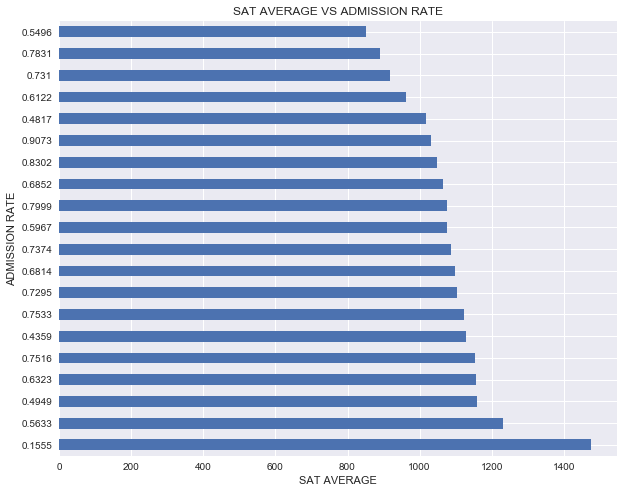

In [28]:
# Bar plot showing SAT AVERAGE and ADMISSION RATE.
fig, ax = plt.subplots(figsize=(10,8))
sat_admin_new.iloc[0:20, :].groupby('ADM_RATE')['SAT_AVG'].mean().sort_values(ascending=False).plot(kind='barH', ax=ax, title='SAT AVERAGE VS ADMISSION RATE')
plt.xlabel('SAT AVERAGE')
plt.ylabel('ADMISSION RATE')

AS SHOWN BELOW THAT WE CAN INFER THAT THE INSTITUTIONS WITH HIGH SAT AVERAGE HAVE LOW ADMISSION RATE. IT CAN BE INFER THAT THIS INSTITUTIONS ADMISSION CAN BE COMPETITIVE. 

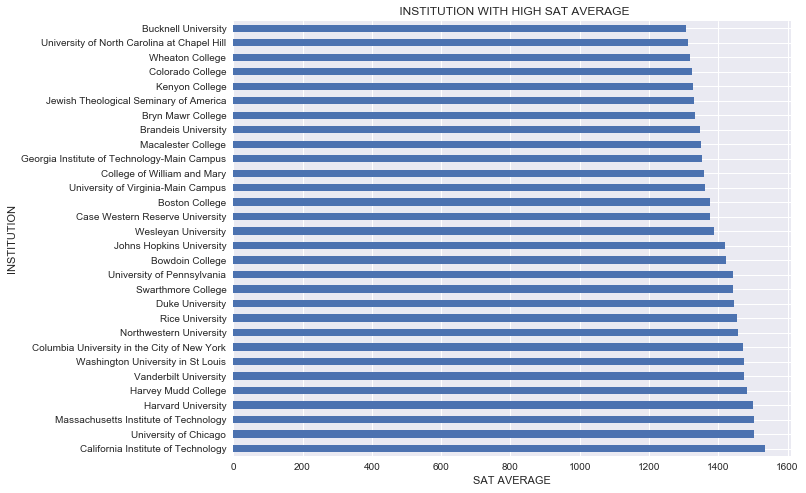

In [29]:
# Bar plot of institution with high SAT Average. 
fig, ax = plt.subplots(figsize=(10,8))
sat_admin_new.groupby('Name')['SAT_AVG'].mean().sort_values(ascending=False).head(30).plot(kind='barH',title=' INSTITUTION WITH HIGH SAT AVERAGE', ax=ax)
plt.xlabel('SAT AVERAGE')
plt.ylabel('INSTITUTION');

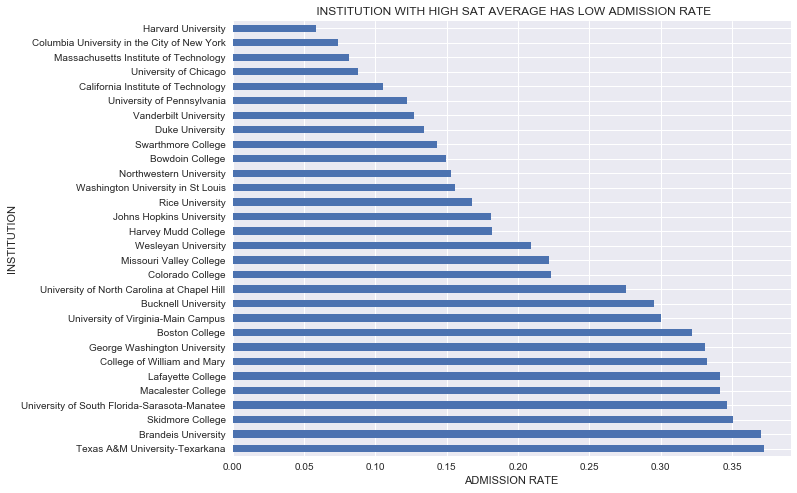

In [30]:
# Bar plot of institution with their Admission Rate.
fig, ax = plt.subplots(figsize=(10,8))
sat_admin_new.groupby('Name')['ADM_RATE'].mean().sort_values(ascending=False).tail(30).plot(kind='barH',title=' INSTITUTION WITH HIGH SAT AVERAGE HAS LOW ADMISSION RATE', ax=ax)
plt.xlabel('ADMISSION RATE')
plt.ylabel('INSTITUTION');

CONVERSELY, IT IS SEEN BELOW THAT INSTITUTION WITH LOW SAT AVERAGE HAS HIGH ADMISSION RATE.

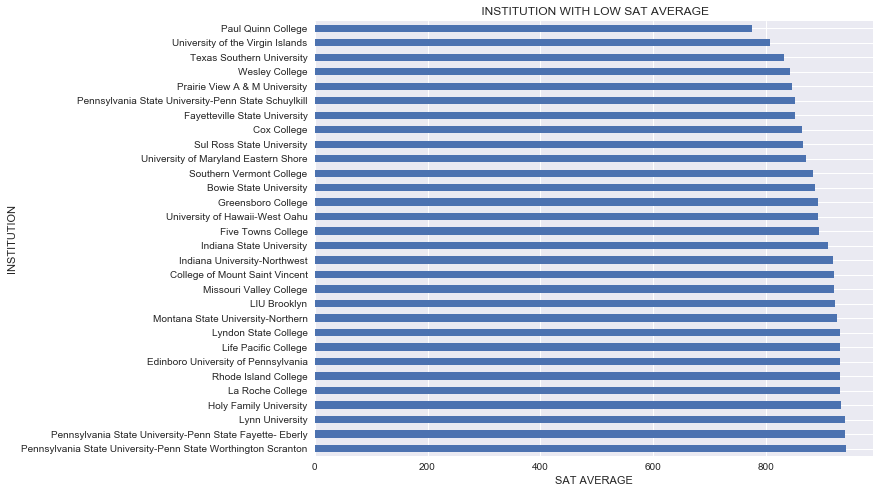

In [31]:
# Bar plot of institution with high SAT Average. 
fig, ax = plt.subplots(figsize=(10,8))
sat_admin_new.groupby('Name')['SAT_AVG'].mean().sort_values(ascending=False).tail(30).plot(kind='barH',title=' INSTITUTION WITH LOW SAT AVERAGE', ax=ax)
plt.xlabel('SAT AVERAGE')
plt.ylabel('INSTITUTION');

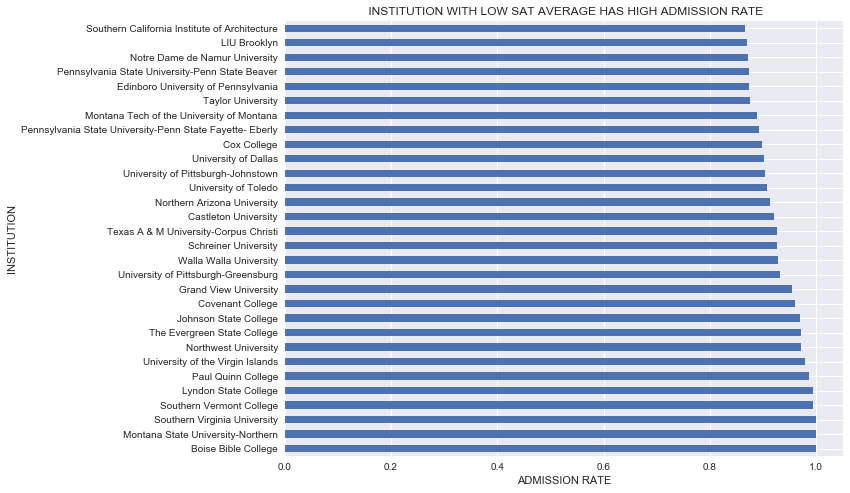

In [32]:
# Bar plot of institution with their Admission Rate.
fig, ax = plt.subplots(figsize=(10,8))
sat_admin_new.groupby('Name')['ADM_RATE'].mean().sort_values(ascending=False).head(30).plot(kind='barH',title=' INSTITUTION WITH LOW SAT AVERAGE HAS HIGH ADMISSION RATE', ax=ax)
plt.xlabel('ADMISSION RATE')
plt.ylabel('INSTITUTION');

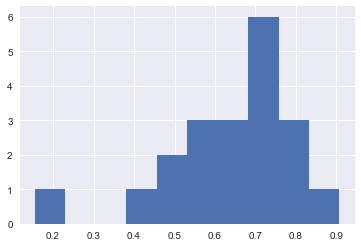

In [33]:
sat_admin_new.ADM_RATE.head(20).hist(bins=10) # Likely target variable. This shows that Admission rate is negatively 
# skewed from the plot which is logical because institution with high admission rate are more.

### REGRESSION: THE GOAL IS TO PREDICT ADMISSION RATE OF THE VARIOUS INSTITUTIONS.

In [34]:
sat_score_reg = sat_admin_new.copy() # make a copy of the dataframe.

In [35]:
sat_score_reg.shape # verify the dimension of the dataset.

(2649, 40)

In [36]:
sat_score_reg.head(2) # Checking the column header for the variables/features.

index  P_AGRIC  P_ARCH  P_BIOL  P_COMM_TECH  P_COMP  P_ENGR  P_ENGR_TECH  \
0      1      0.0  0.0255  0.1022          0.0  0.0324  0.1551          0.0   
1     10      0.0  0.0000  0.0907          0.0  0.0343  0.0000          0.0   

   P_MATHS  P_PHY_SCI  ...    SATWR75  SAT_AVG_ALL  SAT_AVG  SATVRMID  \
0   0.0212     0.0349  ...      770.0       1474.0   1474.0     730.0   
1   0.0221     0.0539  ...      575.0       1155.0   1155.0     543.0   

   SATMTMID  SATWRMID      id          city  \
0     755.0     735.0  179867   Saint Louis   
1     553.0     518.0  174792  Collegeville   

                                Name  State  
0  Washington University in St Louis     MO  
1             Saint Johns University     MN  

[2 rows x 40 columns]

In [37]:
sat_score_reg1 = sat_score_reg.drop(['id', 'city', 'Name', 'State', 'index'], axis=1) # dropping the object type features.

In [38]:
sat_score_reg1.head(2) # verifying the drop.

P_AGRIC  P_ARCH  P_BIOL  P_COMM_TECH  P_COMP  P_ENGR  P_ENGR_TECH  P_MATHS  \
0      0.0  0.0255  0.1022          0.0  0.0324  0.1551          0.0   0.0212   
1      0.0  0.0000  0.0907          0.0  0.0343  0.0000          0.0   0.0221   

   P_PHY_SCI  P_SCI_TECH    ...     SATMT25  SATWR25  SATVR75  SATMT75  \
0     0.0349         0.0    ...       720.0    700.0    760.0    790.0   
1     0.0539         0.0    ...       480.0    460.0    610.0    625.0   

   SATWR75  SAT_AVG_ALL  SAT_AVG  SATVRMID  SATMTMID  SATWRMID  
0    770.0       1474.0   1474.0     730.0     755.0     735.0  
1    575.0       1155.0   1155.0     543.0     553.0     518.0  

[2 rows x 35 columns]

In [39]:
sat_score_reg1.corr() # Observing the correlation between the features.

P_AGRIC    P_ARCH    P_BIOL  P_COMM_TECH    P_COMP    P_ENGR  \
P_AGRIC       1.000000  0.015013  0.162989    -0.030413 -0.043730  0.018664   
P_ARCH        0.015013  1.000000 -0.074648    -0.010145 -0.049387  0.008066   
P_BIOL        0.162989 -0.074648  1.000000    -0.076443 -0.152883  0.168810   
P_COMM_TECH  -0.030413 -0.010145 -0.076443     1.000000  0.000280 -0.043268   
P_COMP       -0.043730 -0.049387 -0.152883     0.000280  1.000000  0.274227   
P_ENGR        0.018664  0.008066  0.168810    -0.043268  0.274227  1.000000   
P_ENGR_TECH  -0.017216 -0.021206 -0.172617    -0.035375  0.126565 -0.019480   
P_MATHS      -0.079579 -0.055695  0.317361    -0.060706  0.066409  0.275877   
P_PHY_SCI    -0.044181 -0.053173  0.445978    -0.071805  0.107896  0.302121   
P_SCI_TECH    0.001154 -0.004030 -0.000486    -0.008075 -0.014807  0.016063   
ACTCM25      -0.029105 -0.020444  0.423113    -0.081006  0.010997  0.463621   
ACTEN25      -0.023392 -0.095746  0.431350    -0.078701 -0.007658  0.428317   
ACTMT25      -0.043909 -0.007493  0.418972    -0.096479  0.037070  0.510487   
ACTWR25      -0.039579 -0.035761  0.297578    -0.044149 -0.046182  0.272799   
ACTCM75      -0.009305 -0.043468  0.402033    -0.124902  0.015607  0.446106   
ACTEN75      -0.028647 -0.091751  0.377855    -0.093589 -0.033203  0.383563   
ACTMT75      -0.024300  0.070309  0.391622    -0.129897  0.037684  0.525760   
ACTWR75      -0.079993 -0.033914  0.237210    -0.054275 -0.048729  0.165347   
ACTCMMID     -0.024329 -0.035000  0.420010    -0.097524  0.013274  0.455293   
ACTENMID     -0.021813 -0.092034  0.405967    -0.085806 -0.016609  0.410614   
ACTMTMID     -0.031153  0.025063  0.411389    -0.109995  0.039376  0.533267   
ACTWRMID     -0.055349 -0.047561  0.258191    -0.060340 -0.053195  0.245331   
ADM_RATE_ALL  0.006956  0.057957 -0.272555     0.057425 -0.114633 -0.287331   
ADM_RATE     -0.005099  0.047965 -0.310875     0.043942  0.011780 -0.286185   
SATVR25      -0.055094 -0.032751  0.377751    -0.073266 -0.032102  0.408319   
SATMT25      -0.016540  0.095294  0.416581    -0.100045  0.014659  0.511414   
SATWR25      -0.053577 -0.018757  0.379341    -0.077198 -0.031000  0.417459   
SATVR75      -0.030606  0.008474  0.327331    -0.096381 -0.039960  0.395493   
SATMT75      -0.026220  0.108547  0.394046    -0.121729 -0.013277  0.498332   
SATWR75      -0.044023  0.008747  0.384581    -0.093818 -0.073264  0.408515   
SAT_AVG_ALL  -0.045004  0.028033  0.370401    -0.117129  0.123360  0.454556   
SAT_AVG      -0.035084  0.035578  0.422085    -0.102010 -0.006607  0.464828   
SATVRMID     -0.043357 -0.012764  0.358958    -0.086032 -0.036546  0.408650   
SATMTMID     -0.021568  0.103197  0.411525    -0.112214  0.001066  0.512360   
SATWRMID     -0.049541 -0.005330  0.387182    -0.086601 -0.052468  0.418692   

              P_ENGR_TECH   P_MATHS  P_PHY_SCI  P_SCI_TECH    ...     \
P_AGRIC         -0.017216 -0.079579  -0.044181    0.001154    ...      
P_ARCH          -0.021206 -0.055695  -0.053173   -0.004030    ...      
P_BIOL          -0.172617  0.317361   0.445978   -0.000486    ...      
P_COMM_TECH     -0.035375 -0.060706  -0.071805   -0.008075    ...      
P_COMP           0.126565  0.066409   0.107896   -0.014807    ...      
P_ENGR          -0.019480  0.275877   0.302121    0.016063    ...      
P_ENGR_TECH      1.000000 -0.138111  -0.094071   -0.012809    ...      
P_MATHS         -0.138111  1.000000   0.731274   -0.020606    ...      
P_PHY_SCI       -0.094071  0.731274   1.000000    0.016480    ...      
P_SCI_TECH      -0.012809 -0.020606   0.016480    1.000000    ...      
ACTCM25         -0.192298  0.477906   0.562968   -0.004813    ...      
ACTEN25         -0.217209  0.468136   0.545623   -0.007302    ...      
ACTMT25         -0.152420  0.497970   0.565525    0.003728    ...      
ACTWR25         -0.170570  0.270515   0.338549   -0.016690    ...      
ACTCM75         -0.223644  0.443216   0.527872   -0.006642    ...      
ACTEN75         -0

In [40]:
# Checking for statistical significance of my features to pick for my modeling.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
sat_score_reg1.columns

Index(['P_AGRIC', 'P_ARCH', 'P_BIOL', 'P_COMM_TECH', 'P_COMP', 'P_ENGR',
       'P_ENGR_TECH', 'P_MATHS', 'P_PHY_SCI', 'P_SCI_TECH', 'ACTCM25',
       'ACTEN25', 'ACTMT25', 'ACTWR25', 'ACTCM75', 'ACTEN75', 'ACTMT75',
       'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID',
       'ADM_RATE_ALL', 'ADM_RATE', 'SATVR25', 'SATMT25', 'SATWR25', 'SATVR75',
       'SATMT75', 'SATWR75', 'SAT_AVG_ALL', 'SAT_AVG', 'SATVRMID', 'SATMTMID',
       'SATWRMID'],
      dtype='object')

In [42]:
# Checking for the statistical significance of my features to pick the predictor variables.
y, X = dmatrices("ADM_RATE ~ P_AGRIC + P_ARCH + P_BIOL + P_COMM_TECH + P_COMP + P_ENGR+ \
        P_ENGR_TECH + P_MATHS + P_PHY_SCI + P_SCI_TECH + ACTCM25+ \
        ACTEN25 + ACTMT25 + ACTWR25 + ACTCM75 + ACTEN75 + ACTMT75+ \
        ACTWR75 + ACTCMMID + ACTENMID + ACTMTMID + ACTWRMID+ \
        ADM_RATE_ALL + SATVR25 + SATMT25 + SATWR25 + SATVR75+ \
        SATMT75 + SATWR75 + SAT_AVG_ALL + SAT_AVG + SATVRMID + SATMTMID+ \
        SATWRMID", data=sat_score_reg, return_type ="dataframe")

# vif for each of Xi,
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
output = sm.OLS(y, X).fit()

In [43]:
output.summary() # Features with p value less than 0.05 will be chosen as my predictors.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ADM_RATE   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     6357.
Date:                Thu, 30 Nov 2017   Prob (F-statistic):               0.00
Time:                        13:45:21   Log-Likelihood:                 6341.1
No. Observations:                2649   AIC:                        -1.261e+04
Df Residuals:                    2614   BIC:                        -1.241e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0076      0.009     -0.837      0.403      -0.026       0.010
P_AGRIC         -0.0073      0.015     -0.493      0.622      -0.036       0.022
P_ARCH           0.0226      0.009      2.461      0.014       0.005       0.041
P_BIOL           0.0418      0.013      3.245      0.001       0.017       0.067
P_COMM_TECH      0.0232      0.038      0.619      0.536      -0.050       0.097
P_COMP           0.0836      0.020      4.261      0.000       0.045       0.122
P_ENGR           0.0089      0.008      1.149      0.251      -0.006       0.024
P_ENGR_TECH      0.2179      0.018     12.227      0.000       0.183       0.253
P_MATHS          0.0470      0.042      1.113      0.266      -0.036       0.130
P_PHY_SCI        0.0027      0.035      0.078      0.938      -0.065       0.071
P_SCI_TECH       0.2905      0.393      0.739      0.460      -0.480       1.061
ACTCM25          0.0050      0.001      4.082      0.000       0.003       0.007
ACTEN25         -0.0009      0.001     -0.829      0.407      -0.003       0.001
ACTMT25         -0.0025      0.001     -2.400      0.016      -0.005      -0.000
ACTWR25         -0.0013      0.002     -0.644      0.520      -0.005       0.003
ACTCM75          0.0080      0.001      6.387      0.000       0.006       0.010
ACTEN75         -0.0018      0.001     -1.566      0.117      -0.004       0.000
ACTMT75         -0.0073      0.001     -6.872      0.000      -0.009      -0.005
ACTWR75          0.0065      0.001      5.125      0.000       0.004       0.009
ACTCMMID        -0.0126      0.002     -6.436      0.000      -0.016      -0.009
ACTENMID         0.0056      0.002      2.965      0.003       0.002       0.009
ACTMTMID         0.0086      0.002      4.713      0.000       0.005       0.012
ACTWRMID        -0.0044      0.002     -1.803      0.072      -0.009       0.000
ADM_RATE_ALL     1.0105      0.003    301.768      0.000       1.004       1.017
SATVR25          0.0137      0.003      4.439      0.000       0.008       0.020
SATMT25          0.0043      0.003      1.273      0.203      -0.002       0.011
SATWR25         -0.0103      0.003     -3.964      0.000      -0.015      -0.005
SATVR75          0.0134      0.003      4.333      0.000       0.007       0.019
SATMT75          0.0048      0.003      1.418      0.156      -0.002       0.011
SATWR75         -0.0105      0.003     -4.029      0.000      -0.016      -0.005
SAT_AVG_ALL      0.0011   1.52e-05     72.230      0.000       0.001       0.001
SAT_AVG         -0.0012   3.63e-05    -32.069      0.000      -0.001      -0.001
SATVRMID        -0.0271      0.006     -4.385      0.000      -0.039      -0.015
SATMTMID        -0.0089      0.007     -1.318      0.188      -0.022       0.004
SATWRMID         0.0207      0.005      3.960      0.000       0.010       0.031
=====

In [44]:
# Features selection based on the output of the statistical significance of p value = 0.05
y = sat_score_reg1.ADM_RATE.values
XX = sat_score_reg1[['P_ARCH', 'P_BIOL', 'P_COMP', 'P_ENGR_TECH', 'ACTCM25', 'ACTMT25', 'ACTCM75', 'ACTMT75', 'ACTWR75', 'ACTCMMID',
 'ACTENMID', 'ACTMTMID', 'ADM_RATE_ALL', 'SATVR25', 'SATWR25', 'SATVR75', 'SATWR75', 'SAT_AVG_ALL',
 'SAT_AVG', 'SATVRMID', 'SATWRMID']]

In [46]:
baseline = np.mean(sat_score_reg['ADM_RATE'])
print('Baseline', baseline) # 

Baseline 0.6399625141562854


In [47]:
# Standardizing the selected features.
XX_new= (XX - XX.mean())/XX.std() # AFter standardization, the features will have mean 
#== 0 and variance of 1.

In [48]:
#Calculating the correlation between the selected features.
XX_new_corr = XX_new.corr()

In [49]:
XX_new_corr

P_ARCH    P_BIOL    P_COMP  P_ENGR_TECH   ACTCM25   ACTMT25  \
P_ARCH        1.000000 -0.074648 -0.049387    -0.021206 -0.020444 -0.007493   
P_BIOL       -0.074648  1.000000 -0.152883    -0.172617  0.423113  0.418972   
P_COMP       -0.049387 -0.152883  1.000000     0.126565  0.010997  0.037070   
P_ENGR_TECH  -0.021206 -0.172617  0.126565     1.000000 -0.192298 -0.152420   
ACTCM25      -0.020444  0.423113  0.010997    -0.192298  1.000000  0.968319   
ACTMT25      -0.007493  0.418972  0.037070    -0.152420  0.968319  1.000000   
ACTCM75      -0.043468  0.402033  0.015607    -0.223644  0.930695  0.909633   
ACTMT75       0.070309  0.391622  0.037684    -0.224193  0.924618  0.920154   
ACTWR75      -0.033914  0.237210 -0.048729    -0.125022  0.461113  0.452794   
ACTCMMID     -0.035000  0.420010  0.013274    -0.208971  0.982817  0.955743   
ACTENMID     -0.092034  0.405967 -0.016609    -0.217024  0.959648  0.931820   
ACTMTMID      0.025063  0.411389  0.039376    -0.193827  0.965037  0.979707   
ADM_RATE_ALL  0.057957 -0.272555 -0.114633     0.078149 -0.624940 -0.594852   
SATVR25      -0.032751  0.377751 -0.032102    -0.181137  0.940944  0.927452   
SATWR25      -0.018757  0.379341 -0.031000    -0.198082  0.945360  0.934013   
SATVR75       0.008474  0.327331 -0.039960    -0.213213  0.910366  0.882033   
SATWR75       0.008747  0.384581 -0.073264    -0.214328  0.919815  0.899576   
SAT_AVG_ALL   0.028033  0.370401  0.123360    -0.135843  0.948856  0.940011   
SAT_AVG       0.035578  0.422085 -0.006607    -0.204521  0.974839  0.958778   
SATVRMID     -0.012764  0.358958 -0.036546    -0.200178  0.941316  0.920200   
SATWRMID     -0.005330  0.387182 -0.052468    -0.208956  0.945636  0.929722   

               ACTCM75   ACTMT75   ACTWR75  ACTCMMID    ...     ACTMTMID  \
P_ARCH       -0.043468  0.070309 -0.033914 -0.035000    ...     0.025063   
P_BIOL        0.402033  0.391622  0.237210  0.420010    ...     0.411389   
P_COMP        0.015607  0.037684 -0.048729  0.013274    ...     0.039376   
P_ENGR_TECH  -0.223644 -0.224193 -0.125022 -0.208971    ...    -0.193827   
ACTCM25       0.930695  0.924618  0.461113  0.982817    ...     0.965037   
ACTMT25       0.909633  0.920154  0.452794  0.955743    ...     0.979707   
ACTCM75       1.000000  0.946593  0.508343  0.978018    ...     0.943093   
ACTMT75       0.946593  1.000000  0.495024  0.947516    ...     0.975763   
ACTWR75       0.508343  0.495024  1.000000  0.489986    ...     0.477662   
ACTCMMID      0.978018  0.947516  0.489986  1.000000    ...     0.969178   
ACTENMID      0.965456  0.923830  0.503352  0.977472    ...     0.945733   
ACTMTMID      0.943093  0.975763  0.477662  0.969178    ...     1.000000   
ADM_RATE_ALL -0.540912 -0.560703 -0.425482 -0.591677    ...    -0.588569   
SATVR25       0.900541  0.878540  0.460967  0.936945    ...     0.921779   
SATWR25       0.901099  0.887701  0.492598  0.940291    ...     0.929910   
SATVR75       0.936177  0.896073  0.501442  0.938292    ...     0.905464   
SATWR75       0.945132  0.920787  0.557339  0.945871    ...     0.927210   
SAT_AVG_ALL   0.933788  0.926729  0.476901  0.955825    ...     0.950061   
SAT_AVG       0.963272  0.953925  0.493794  0.984531    ...     0.974384   
SATVRMID      0.933236  0.901837  0.488742  0.953159    ...     0.928931   
SATWRMID      0.935495  0.916436  0.531667  0.956049    ...     0.941384   

              ADM_RATE_ALL   SATVR25   SATWR25   SATVR75   SATWR75  \
P_ARCH            0.057957 -0.032751 -0.018757  0.008474  0.008747   
P_BIOL           -0.272555  0.377751  0.379341  0.327331  0.384581   
P_COMP           -0.114633 -0.032102 -0.031000 -0.039960 -0.073264   
P_ENGR_TECH       0.078149 -0.181137 -0.198082 -0.213213 -0.214328   
ACTCM25          -0.624940  0.940944  0.945360  0.910366  0.919815   
ACTMT25          -0.594852  0.927452  0.934013  0.882033  0.899576   
ACTCM75          -0.540912  0.900541  0.901099  0.936177  0.945132   
ACTMT75          -0.560703  0.878540  0.8877

THE ESSENCE OF DOING THIS IS TO SHOW THE CORRELATION OF THE PREDICTOR VARIABLES SO AS TO HELP DECIDE IF USING PCA WILL BE HELPFUL TO ELIMINATE REDUNDANCY. 

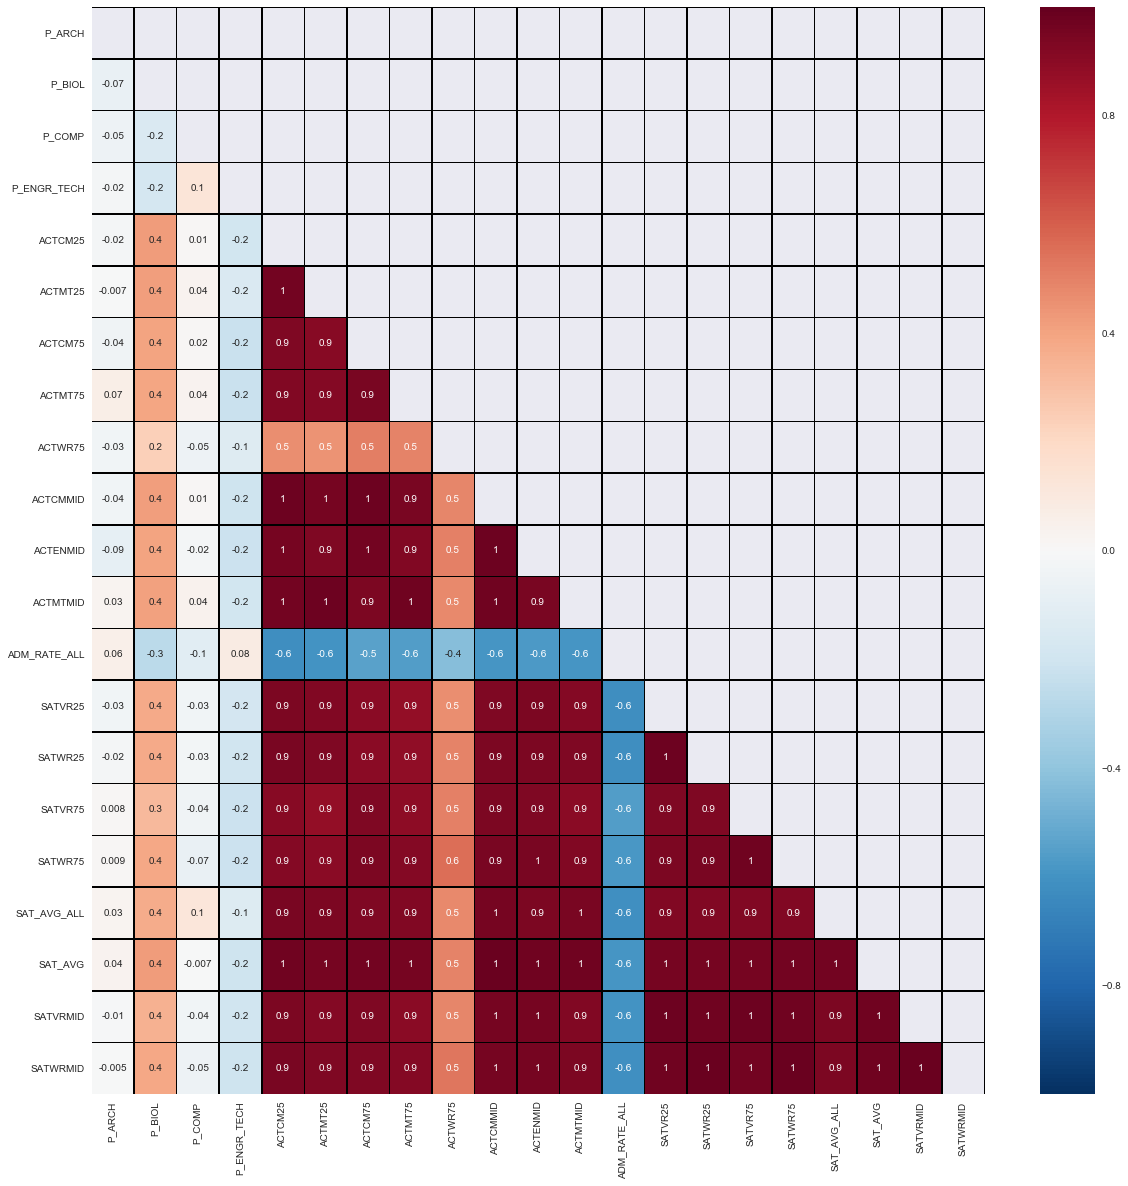

In [50]:
# Heatmap to show the correlation between the feature variables in the absence of the target variable.
mask = np.zeros_like(XX_new_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(XX_new_corr, annot=True, linewidths = 0.5, robust = False, linecolor = 'black', fmt = '.1g', ax=ax, mask=mask)


WITH THE OUTPUT ABOVE, I THINK USING PCA WILL BE HELPFUL.

In [51]:
# Using PCA on the selected features.
from sklearn.decomposition import PCA

X = XX_new.values
pca = PCA()
pca = pca.fit(X)
# Print out the explained variance and each PCA components.
print(pca.explained_variance_)
print(pca.components_)

[  1.50983475e+01   1.23696994e+00   1.05866749e+00   8.66410851e-01
   7.83732303e-01   7.62768377e-01   5.41259963e-01   2.23894301e-01
   1.50016330e-01   7.44171558e-02   5.12237447e-02   3.70453991e-02
   3.45913927e-02   2.67145369e-02   2.08657065e-02   1.29938869e-02
   7.11040369e-03   2.82733876e-03   2.21415738e-03   1.07626874e-06
   6.02915619e-07]
[[ -3.15864039e-03   1.10532478e-01  -1.07663972e-03  -5.61513961e-02
    2.50981492e-01   2.47049635e-01   2.48200373e-01   2.44829044e-01
    1.38419125e-01   2.53628402e-01   2.51409297e-01   2.50609963e-01
   -1.63891905e-01   2.48727221e-01   2.49784007e-01   2.46821488e-01
    2.50400335e-01   2.48679695e-01   2.55417751e-01   2.51899217e-01
    2.53529652e-01]
 [ -1.08541798e-01  -3.47932551e-01   7.31939849e-01   5.18111695e-01
    2.67984722e-02   5.63475954e-02   1.76077469e-03   1.37718204e-02
   -7.07313327e-02   1.55208718e-02  -5.08134984e-03   3.70631223e-02
   -1.81807352e-01   1.01929071e-02   7.29523741e-04  -1

In [52]:
X_sat = pca.transform(X) # Do the transformation here!
print(type(X_sat))
X_features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
X_sat = pd.DataFrame(X_sat, columns=X_features_pca)

<class 'numpy.ndarray'>


In [53]:
X_sat.head() # Checking the PCA component dataframe.

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.812463  0.518169  0.127047  0.112531  0.778931  0.168520  0.575841   
1  0.743267 -0.059966 -0.061041 -0.490394 -0.908619  0.789713 -0.665413   
2  1.131330 -0.131538 -0.159903  0.061565  0.696117 -0.585929  0.731256   
3 -0.101231 -0.593832  0.104942  0.097012 -0.525176 -0.304544  0.298929   
4  1.205113  0.072904  0.155549  0.414006 -0.835703 -0.342502  0.238247   

        PC8       PC9      PC10    ...         PC12      PC13      PC14  \
0  0.141232 -0.421757  0.045933    ...     0.025789 -0.162663 -0.079837   
1 -0.654730 -0.086555 -0.094744    ...    -0.309903  0.116588  0.146667   
2 -0.215754 -0.366602 -0.209663    ...    -0.074392  0.208289  0.176705   
3  0.344290 -0.436690  1.041541    ...     0.253008  0.240771  0.117126   
4 -0.298871 -0.146699 -0.398543    ...    -0.147245 -0.051470  0.042391   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  
0  0.008288  0.065265  0.001439 -0.069834  0.006050  0.000385 -0.000138  
1 -0.119956  0.013018 -0.065494 -0.010475  0.071203  0.006204  0.000949  
2 -0.013915 -0.029651 -0.008485  0.008906 -0.076209 -0.000281 -0.000011  
3  0.218204 -0.110553 -0.133969  0.068087  0.083139  0.000210  0.000180  
4  0.023139  0.023140  0.032882 -0.071480 -0.017480 -0.000350 -0.000036  

[5 rows x 21 columns]

In [54]:
X_sat1 = X_sat.copy() #making a copy of my PCA Dataframe.

In [55]:
X_sat1['target'] = sat_score_reg['ADM_RATE'] # creating a target column to visualize the PCA correlation with the 
# target variable.

In [56]:
X_sat1.head() # checking the new dataframe with the PCA and the target.

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.812463  0.518169  0.127047  0.112531  0.778931  0.168520  0.575841   
1  0.743267 -0.059966 -0.061041 -0.490394 -0.908619  0.789713 -0.665413   
2  1.131330 -0.131538 -0.159903  0.061565  0.696117 -0.585929  0.731256   
3 -0.101231 -0.593832  0.104942  0.097012 -0.525176 -0.304544  0.298929   
4  1.205113  0.072904  0.155549  0.414006 -0.835703 -0.342502  0.238247   

        PC8       PC9      PC10   ...        PC13      PC14      PC15  \
0  0.141232 -0.421757  0.045933   ...   -0.162663 -0.079837  0.008288   
1 -0.654730 -0.086555 -0.094744   ...    0.116588  0.146667 -0.119956   
2 -0.215754 -0.366602 -0.209663   ...    0.208289  0.176705 -0.013915   
3  0.344290 -0.436690  1.041541   ...    0.240771  0.117126  0.218204   
4 -0.298871 -0.146699 -0.398543   ...   -0.051470  0.042391  0.023139   

       PC16      PC17      PC18      PC19      PC20      PC21  target  
0  0.065265  0.001439 -0.069834  0.006050  0.000385 -0.000138  0.1555  
1  0.013018 -0.065494 -0.010475  0.071203  0.006204  0.000949  0.7516  
2 -0.029651 -0.008485  0.008906 -0.076209 -0.000281 -0.000011  0.4359  
3 -0.110553 -0.133969  0.068087  0.083139  0.000210  0.000180  0.6814  
4  0.023140  0.032882 -0.071480 -0.017480 -0.000350 -0.000036  0.6323  

[5 rows x 22 columns]

In [57]:
X_sat1_corr = X_sat1.corr() # Checking the correlation of the new features PCA components. These features covariances 
# have been removed.

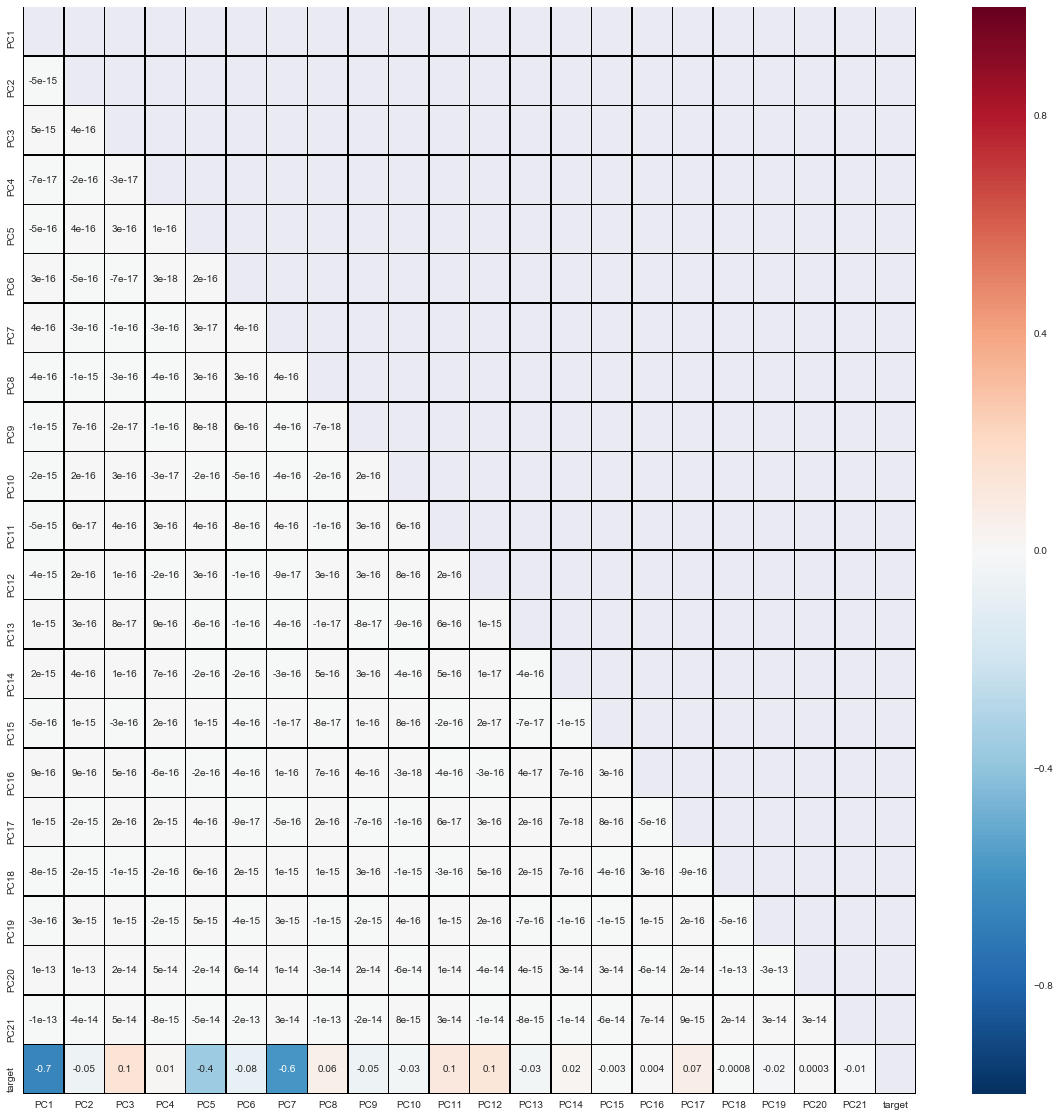

In [58]:
# Showing the heatmap of the new PCA compenents(features).
mask = np.zeros_like(X_sat1_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(X_sat1_corr, annot=True, linewidths = 0.5, robust = False, linecolor = 'black', fmt = '.1g', ax=ax, mask=mask)


In [59]:
# Dropping the last two components due to noise in the selected features.
X_sat_newPCA = X_sat.drop(['PC21', 'PC20'], axis=1) 

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [61]:
X_sat_newPCA['Colleges'] = sat_admin_new['Name'] # Creating a columns Colleges in the PCA DataFrame.

In [62]:
X_sat_newPCA.head(2)  # Verifying that the colleges column was added.

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.812463  0.518169  0.127047  0.112531  0.778931  0.168520  0.575841   
1  0.743267 -0.059966 -0.061041 -0.490394 -0.908619  0.789713 -0.665413   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.141232 -0.421757  0.045933 -0.062184  0.025789 -0.162663 -0.079837   
1 -0.654730 -0.086555 -0.094744  0.411682 -0.309903  0.116588  0.146667   

       PC15      PC16      PC17      PC18      PC19  \
0  0.008288  0.065265  0.001439 -0.069834  0.006050   
1 -0.119956  0.013018 -0.065494 -0.010475  0.071203   

                            Colleges  
0  Washington University in St Louis  
1             Saint Johns University

In [63]:
# tain test split on the new dataset.
X_train, X_test, y_train, y_test = train_test_split(X_sat_newPCA, y, test_size=0.33, random_state=2017)

In [64]:
X_train = X_train.drop('Colleges', axis=1)# dropping the  college column

In [65]:
X_test_Univ = {} # Creating and empty dictionary 
X_test_Univ = X_test['Colleges'] # Assigning a key 'College

In [66]:
X_test = X_test.drop('Colleges', axis = 1) # dropping the  college column

### MODELING USING NEURAL NETWORK

In [67]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline

Using TensorFlow backend.
/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [68]:
X_train.shape #Verifying the X_train dimension

(1774, 19)

In [69]:
# Function that handles the Neural Network.
# Using the Keras Regressor in a Pipeline and passing them to a Grid Search to iterates through.

def NeuralNetwork(layer_one_neurons=19, layer_two_neurons=887, layer_three_neurons=300, layer_four_neurons=100, 
                  input_dim=19):

    model = Sequential()
    model.add(Dense(layer_one_neurons, input_dim = input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dense(layer_three_neurons, activation='relu'))
    model.add(Dense(layer_four_neurons, activation='sigmoid'))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # Compiling my model
    
    return model

keras_model = KerasRegressor(build_fn = NeuralNetwork, input_dim = X_train.shape[1], verbose=0)

pipe = Pipeline([
                ('keras_model', keras_model)
])

params = {
         'keras_model__epochs':[100],
         'keras_model__batch_size':[50],
         'keras_model__layer_one_neurons':[100, 50],
         'keras_model__layer_two_neurons':[50, 25],
         'keras_model__layer_three_neurons':[25, 13],
         'keras_model__layer_four_neurons':[10],
         }

grid = GridSearchCV(pipe, param_grid=params)
grid.fit(X_train.values, y_train)
print(grid.best_score_)
print(grid.best_params_)
grid.score(X_test.values, y_test)

-0.000426259067133
{'keras_model__batch_size': 50, 'keras_model__epochs': 100, 'keras_model__layer_four_neurons': 10, 'keras_model__layer_one_neurons': 100, 'keras_model__layer_three_neurons': 25, 'keras_model__layer_two_neurons': 25}


-0.0013399330965642418

In [70]:
from sklearn.metrics import mean_squared_error, r2_score  # Importing mean and r2 square

In [71]:
y_predictions = grid.predict(X_test.values) #predictions

In [72]:
r2_score(y_test, y_predictions)  #R2 score

0.96803773807023352

In [73]:
result = {} # creating an empty dictionary

In [74]:
# Creating keys - Predictions and Test in the result dictionary.
result['Predictions'] = y_predictions
result['Test'] = y_test
result['College'] = X_test_Univ

In [75]:
final_results = pd.DataFrame(result) #making a dataframe for the result.

In [76]:
final_results.head() #Previewing the Final results.

College  Predictions    Test
1515                       Salisbury University     0.570494  0.5494
824                 North Greenville University     0.583860  0.5791
271   University of North Carolina at Asheville     0.650710  0.6403
1038             The University of West Florida     0.519374  0.4808
2318           University of the Virgin Islands     0.928282  0.9782

In [77]:
final_results['residuals'] = final_results['Test'] - final_results['Predictions'] #creating column for the residuals.

In [78]:
final_results.head() # Checking the header

College  Predictions    Test  \
1515                       Salisbury University     0.570494  0.5494   
824                 North Greenville University     0.583860  0.5791   
271   University of North Carolina at Asheville     0.650710  0.6403   
1038             The University of West Florida     0.519374  0.4808   
2318           University of the Virgin Islands     0.928282  0.9782   

      residuals  
1515  -0.021094  
824   -0.004760  
271   -0.010410  
1038  -0.038574  
2318   0.049918

In [79]:
mean_squared_error(y_test, y_predictions) # calculating the mean square error between predictions and actual values.

0.0013399330693094793

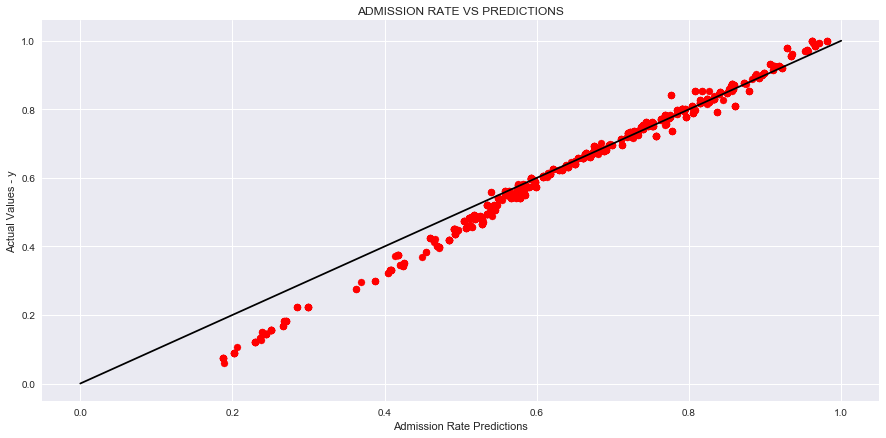

In [80]:
# Plot showing the True value and the predictions

# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(final_results['Predictions'], final_results['Test'], c='r')
plt.plot([0, np.max(final_results['Test'])], [0, np.max(final_results['Test'])], c = 'black')

    
ax.set_xlabel('Admission Rate Predictions')
ax.set_ylabel('Actual Values - y')
ax.set_title('ADMISSION RATE VS PREDICTIONS')

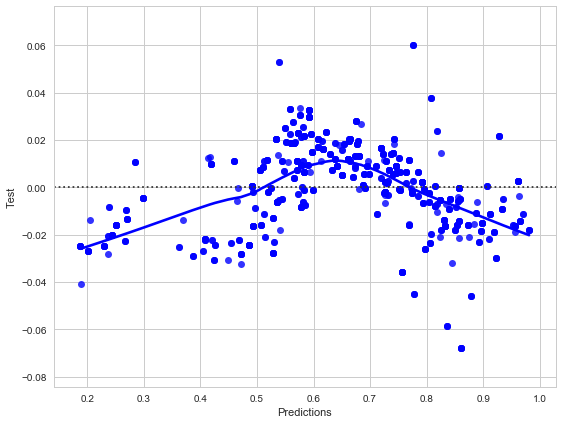

In [81]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

x = final_results['Predictions']
y = final_results['Test']

# Plot the residuals after fitting a linear model
fig, ax = plt.subplots(figsize=(9, 7))
sns.residplot(x, y, lowess=True, color="b", ax=ax, label='Plot of the Residuals')

In [82]:
final_results.to_csv('ADMISSIONS_PREDICTIONS.csv')

#### TABLEAU GRAPHS OF THE RESIDUALS OF THE PREDICTIONS

In [1]:
%%html
<div class='tableauPlaceholder' id='viz1513643665887' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;re&#47;residuals_0&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='residuals_0&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;re&#47;residuals_0&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1513643665887');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='891px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [2]:
%%html
<div class='tableauPlaceholder' id='viz1513643775071' style='position: relative'><noscript><a href='#'><img alt='Story 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;PredictionsVsAdmissionRates&#47;Story2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='PredictionsVsAdmissionRates&#47;Story2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;PredictionsVsAdmissionRates&#47;Story2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1513643775071');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [3]:
%%html
<div class='tableauPlaceholder' id='viz1513643877477' style='position: relative'><noscript><a href='#'><img alt='Story 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sc&#47;ScatterPlotPredictionsVsAdmissionRates&#47;Story3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ScatterPlotPredictionsVsAdmissionRates&#47;Story3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sc&#47;ScatterPlotPredictionsVsAdmissionRates&#47;Story3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1513643877477');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>